## Q2: Interpolation error

There are a large number of different interpolation schemes available through scipy.  Let's test them out.

Create a python function, $f(x)$, that is your true function (make it complicated!).  Now create $N$ samples of it (either regularly spaced or irregularly spaced).

In [16]:
import numpy as np
import scipy.interpolate as interpolate
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt

In [18]:
def fun(x):
    return np.sin(x)**2*x**3 + 2*np.cos(x**2)

In [20]:
N = 10
x = np.linspace(0, 10, N)
y = fun(x)

Try some of the different interpolation routines.  `interpolate.interp1d` takes a `kind` argument that lets you choose the order of the interpolation. Measure the error in the method, by comparing the interpolated result with the actual function value. 

In [23]:
kinds = ['linear', 'quadratic', 'cubic']
interp_methods = {}
error = np.zeros(0)
for kind in kinds:
    interp_methods[kind] = interpolate.interp1d(x, y, kind = kind)
    y_interp = interp_methods[kind](x)

Then do the same cubic splines (look at `CubicSpline`)

In [26]:
f_cs = CubicSpline(x, y)
y_cs = f_cs(x)

Plot the resulting interpolant.

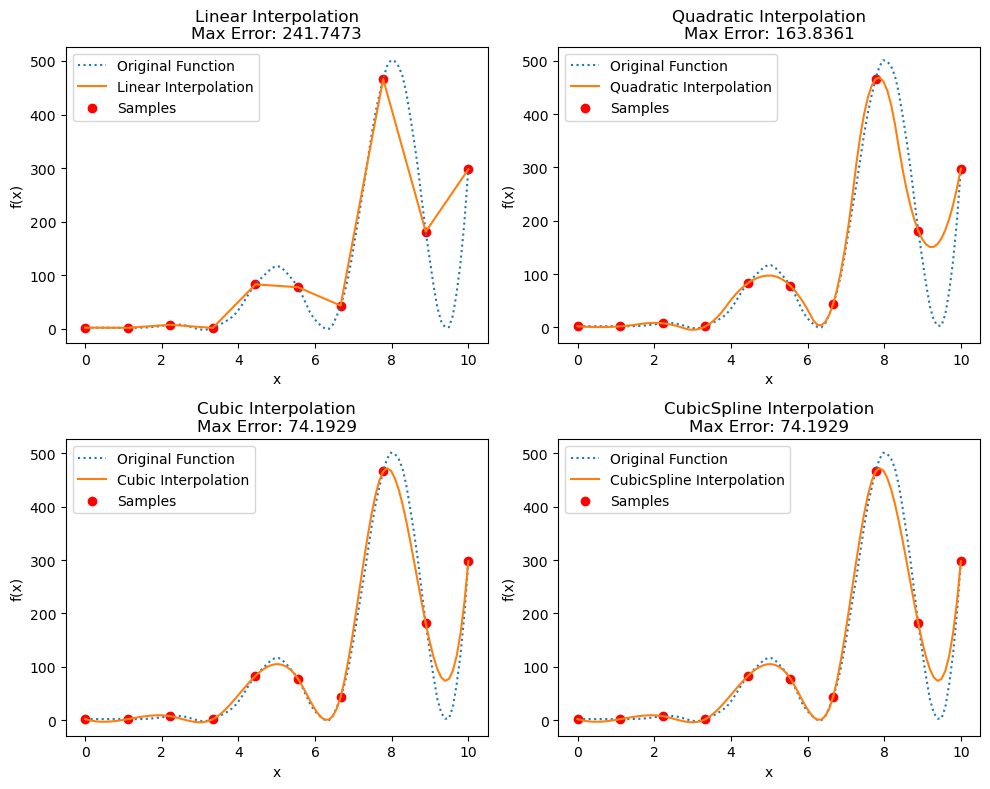

In [29]:
x_fine = np.linspace(0, 10, 10*N)

plt.figure(figsize=(10, 8))

for i, kind in enumerate(kinds, 1):
    y_interp = interp_methods[kind](x_fine)
    error = np.abs(y_interp - fun(x_fine))
    
    plt.subplot(2, 2, i)
    plt.plot(x_fine, fun(x_fine), ls = ':', label='Original Function')
    plt.plot(x_fine, y_interp, label=f'{kind.capitalize()} Interpolation')
    plt.scatter(x, y, color='red', label='Samples')
    plt.title(f'{kind.capitalize()} Interpolation\nMax Error: {error.max():.4f}')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('f(x)')


y_cs_interp = f_cs(x_fine)
error_cs = np.abs(y_cs_interp - fun(x_fine))

plt.subplot(2, 2, 4)
plt.plot(x_fine, fun(x_fine), ls=':', label='Original Function')
plt.plot(x_fine, y_cs_interp, label='CubicSpline Interpolation')
plt.scatter(x, y, color='red', label='Samples')
plt.title(f'CubicSpline Interpolation\nMax Error: {error_cs.max():.4f}')
plt.legend()
plt.xlabel('x')
plt.ylabel('f(x)')

plt.tight_layout()
plt.show()